## Problem Sheet Question 2a

The general form of the population growth differential equation
$$ y^{'}=ty^3-y, \ \ (0 \leq t \leq 2) $$
with the initial condition
$$y(0)=1$$
For N=4
$$ y(x_1)= 0.5$$

### 2-step Adams Bashforth

The 2-step Adams Bashforth difference equation is
$$w^{0}_{i+1} = w_{i} + \frac{h}{2}(3f(t_i,w_i)-f(t_{i-1},w_{i-1})) $$
$$w^{0}_{i+1} = w_{i} + \frac{h}{2}(3(t_iw_i^3-w_i)-(t_{i-1}w_{i-1}^3-w_{i-1})) $$
### 3-step Adams Moulton
$$w^{1}_{i+1} = w_{i} + \frac{h}{12}(5f(t_{i+1},w^{0}_{i+1})+8f(t_{i},w_{i})-f(t_{i-1},w_{i-1})) $$

$$ w^{1}_{i+1} = w_{i} + \frac{h}{12}(5(t_{i+1}(w^0_{i+1})^3-w^0_{i+1})+8(t_{i}w_{i}^3-w_{i})-(t_{i-1}w_{i-1}^3-w_{i-1})) $$


In [1]:
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


In [2]:
def myfun_ty(t,y):
    return y*y*y*t-y



#PLOTS
def Adams_Bashforth_Predictor_Corrector(N,IC):

    x_end=2
    x_start=0
    INTITIAL_CONDITION=IC
    h=x_end/(N)
    N=N+2;
    t=np.zeros(N)
    w_predictor=np.zeros(N)
    w_corrector=np.zeros(N)
   
    Analytic_Solution=np.zeros(N)
    k=0
    w_predictor[0]=INTITIAL_CONDITION
    w_corrector[0]=INTITIAL_CONDITION
    Analytic_Solution[0]=INTITIAL_CONDITION
    t[0]=x_start
    t[1]=x_start+1*h
    t[2]=x_start+2*h
    w_predictor[1]=0.5
    w_corrector[1]=0.5
   
    for k in range (2,N-1):
        w_predictor[k+1]=w_corrector[k]+h/2.0*(3*myfun_ty(t[k],w_corrector[k])-myfun_ty(t[k-1],w_corrector[k-1]))
        w_corrector[k+1]=w_corrector[k]+h/12.0*(5*myfun_ty(t[k+1],w_predictor[k+1])+8*myfun_ty(t[k],w_corrector[k])-myfun_ty(t[k-1],w_corrector[k-1]))
        t[k+1]=t[k]+h
   
    fig = plt.figure(figsize=(10,4))
    # --- left hand plot
    ax = fig.add_subplot(1,2,1)
    plt.plot(t,w_predictor,color='red')
    #ax.legend(loc='best')
    plt.title('Predictor h=%s'%(h))

    # --- right hand plot
    ax = fig.add_subplot(1,2,2)
    plt.plot(t,w_corrector,color='blue')
    plt.title('Corrector')

    # --- titled , explanatory text and save
    fig.suptitle(r"$y'=ty^3-y$", fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)    
    print('time')
    print(t)
    print('Predictor')
    print(w_predictor)
    print('Corrector')
    print(w_corrector)

time
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2]
Predictor
[1.00000000e+00 5.00000000e-01 0.00000000e+00 4.75000000e-02
 2.77084450e-03 2.63559724e-03 2.15353298e-03 1.76273674e-03
 1.44282559e-03 1.18097388e-03 9.66644343e-04 7.91212442e-04]
Corrector
[1.00000000e+00 5.00000000e-01 0.00000000e+00 3.95833333e-03
 3.19965681e-03 2.61937789e-03 2.14399600e-03 1.75489271e-03
 1.43640563e-03 1.17571911e-03 9.62343270e-04 7.87691972e-04]


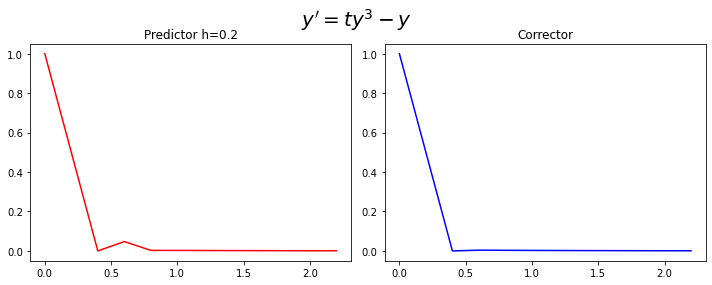

In [3]:
Adams_Bashforth_Predictor_Corrector(10,1)